In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import correlate

In [2]:
file_path = 'cal.m4a'

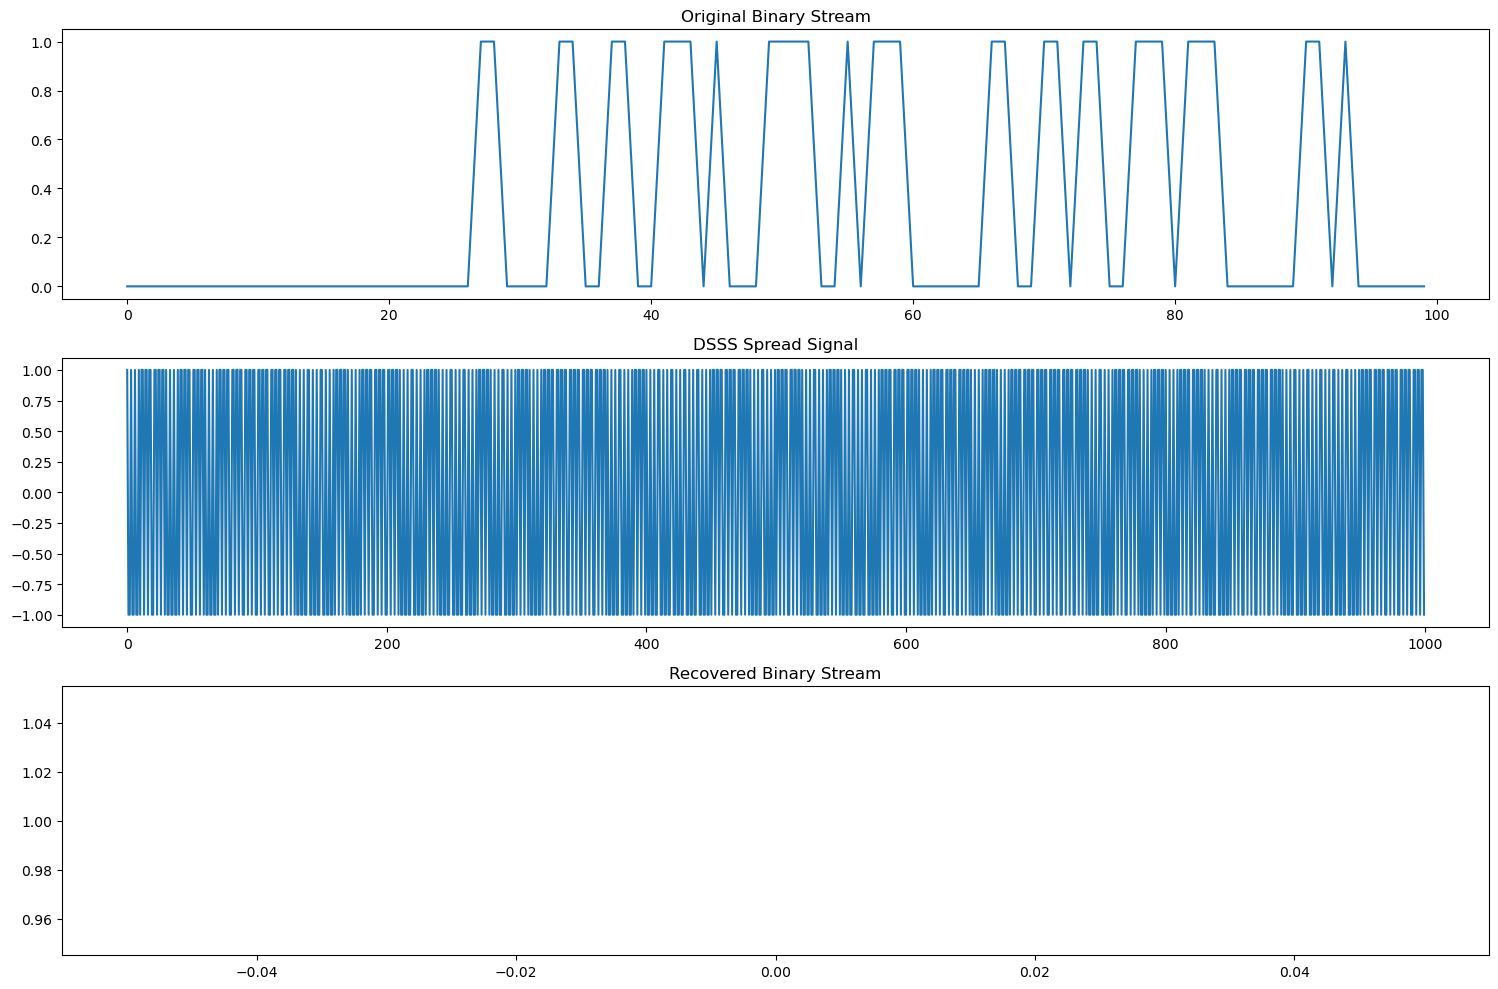

In [9]:
random_binary_list = np.random.choice([0, 1], size=10000000)


# Function to read binary file
def read_binary_file(file_path):
    with open(file_path, 'rb') as file:
        binary_data = file.read()
    return np.unpackbits(np.frombuffer(binary_data, dtype=np.uint8))

# Function to write binary file
def write_binary_file(file_path, binary_data):
    byte_data = np.packbits(binary_data)
    with open(file_path, 'wb') as file:
        file.write(byte_data)

# Load binary file and convert to binary stream
binary_stream = read_binary_file(file_path)  # Replace with your binary file

# Parameters
chip_rate = 10  # Number of chips per binary bit
sample_rate = 48000  # Sample rate for the signals

# Generate PN code
pn_code = np.random.choice([1, -1], size=chip_rate)

# Function to spread the binary stream
def spread_signal(binary_stream, pn_code, chip_rate):
    spread_signal = np.repeat(binary_stream * 2 - 1, chip_rate) * np.tile(pn_code, len(binary_stream))
    return spread_signal

# Function to despread the received signal
def despread_signal(received_signal, pn_code, chip_rate):
    despread_signal = np.correlate(received_signal, np.tile(pn_code, len(received_signal) // chip_rate), mode='valid')
    despread_signal = despread_signal[::chip_rate]
    demodulated_bits = ((despread_signal > 0) * 1).astype(np.uint8)  # Convert to 0 and 1
    return demodulated_bits

# Spread the binary stream
spread_signal = spread_signal(random_binary_list, pn_code, chip_rate)

# Simulate received signal (assume perfect transmission for simplicity)
received_signal = spread_signal

# Despread the received signal
recovered_binary_stream = despread_signal(received_signal, pn_code, chip_rate)

# Save the recovered binary stream to a file
# write_binary_file('recovered_binary_file.m4a', recovered_binary_stream)

# Plot the original, spread, and recovered signals
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(binary_stream[:100])
plt.title('Original Binary Stream')

plt.subplot(3, 1, 2)
plt.plot(spread_signal[:1000])
plt.title('DSSS Spread Signal')

plt.subplot(3, 1, 3)
plt.plot(recovered_binary_stream[:100])
plt.title('Recovered Binary Stream')

plt.tight_layout()
plt.show()



In [14]:
df  =random_binary_list-recovered_binary_stream
sum(df)

-4998425